# Capstone Project: Consumer Insights for Beats by Dre

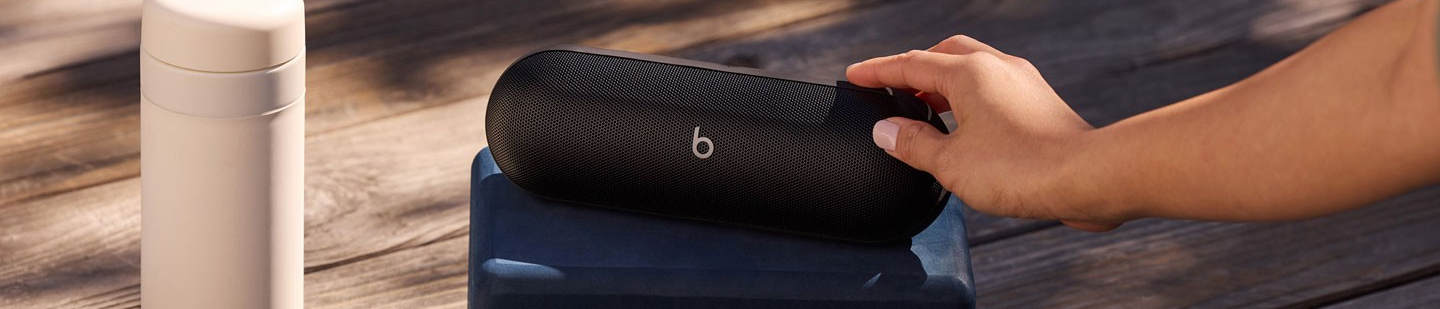


**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Youness Nait Oufkir  
**Date:** October 6th, 2024

## Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

Importing all the libraries needed for this project

In [ ]:
# @title
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Plot style
plt.style.use('dark_background')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing (NLP)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
!pip install contractions
import contractions

# Word Clouds
from wordcloud import WordCloud
from PIL import Image

# Sentiment Analysis
from textblob import TextBlob
from transformers import pipeline

# Google Gemini AI
import google.generativeai as genai

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.6 MB/s eta 0:00:00


## 1. Introduction

### 1.1 Project Overview

This project leverages data analytics and AI to provide actionable insights for improving product development and customer experience. This analysis focus on the **Beats Pill** Bluetooth speaker, along with competitor products, it aims to understand customer perceptions, uncover sentiment trends, analyze pain points, and recommend improvements.


1. Collect review data for the Beats Pill and other competitor products from **amazon.com** using the **Oxylabs API**.

2. Clean the data to address inconsistencies, and prepare it for analysis.

3. Perform Exploratory Data Analysis (EDA) using visualizations and statistical tools to identify patterns and trends within the customer feedback.

4. Conduct sentiment analysis to categorize customer reviews as positive, negative, or neutral.

5. Leverage Gemini AI to extract key patterns from customer feedback, uncovering deeper insights into product strengths and customer pain points.

6. Integrate all the previous analyses into a comprehensive report, providing strategic recommendations for Beats product team.

### 1.2 Background

**Beats by Dre**, is a leading brand in the audio industry, renowned for combining superior sound with sleek design. As a subsidiary of **Apple**, Beats continues to shape the global audio market by appealing to a wide range of consumers, from audiophiles to casual listeners.

In the tech industry, understanding consumer sentiment is crucial for maintaining a competitive edge. Sentiment analysis allows companies to gauge customer perceptions, identify strengths and weaknesses, and make data-driven decisions. For Beats by Dre, analyzing consumer feedback provides valuable insights into how customers view their products, enabling the company to refine features, address pain points, and enhance overall customer satisfaction. This kind of analysis is essential in the fast-paced audio industry, where innovation and customer preferences are constantly evolving.

## 2. Data Description

### 2.1 Data Sources

amazon.com is the source of customer reviews data. Amazon was chosen as it offers a large volume of user-generated reviews that include detailed feedback on product performance, quality, and features.

Here are the links to the product pages:

[Beats Pill](https://www.amazon.com/Beats-Pill-Compatible-Built-Microphone/dp/B0D4SX9RC6/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1)

[Sony ULT Field 1](https://www.amazon.com/Sony-Bluetooth-Waterproof-Shockproof-Detachable/dp/B0CXL4FQBK/ref=pd_rhf_se_s_pd_sbs_rvi_d_sccl_1_6/139-4483843-5267218?pd_rd_w=Tqznh&content-id=amzn1.sym.46e2be74-be72-4d3f-86e1-1de279690c4e&pf_rd_p=46e2be74-be72-4d3f-86e1-1de279690c4e&pf_rd_r=DCKKQFSCBG2XN7APHQ5K&pd_rd_wg=OMxBz&pd_rd_r=de045761-6758-4972-9dfb-619d6f9c7eb2&pd_rd_i=B0CXL4FQBK&th=1)

[Bose SoundLink Flex](https://www.amazon.com/Bose-SoundLink-Bluetooth-Portable-Waterproof/dp/B099TLMRB6/ref=pd_ci_mcx_pspc_dp_d_2_t_3?pd_rd_w=YcyCK&content-id=amzn1.sym.568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_p=568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_r=3DFD8EGA5AA7HJ9EBQ8P&pd_rd_wg=sjdnY&pd_rd_r=f500b781-5b82-4fe9-86eb-93878bb13d35&pd_rd_i=B099TLMRB6&th=1)

[Jabra Speak 510+](https://www.amazon.com/Jabra-Speak-Portable-Speaker-Music/dp/B00BKD738I/ref=pd_ci_mcx_di_int_sccai_cn_d_sccl_3_1/139-4483843-5267218?pd_rd_w=Gojyr&content-id=amzn1.sym.751acc83-5c05-42d0-a15e-303622651e1e&pf_rd_p=751acc83-5c05-42d0-a15e-303622651e1e&pf_rd_r=CW0ASRZC81Q72PGXYB3G&pd_rd_wg=vouj1&pd_rd_r=e5bf99e0-cd0d-4ccf-993a-1c6645b920a7&pd_rd_i=B00BKD738I&psc=1)

[JBL Charge 5](https://www.amazon.com/JBL-Portable-Bluetooth-Hardshell-Waterproof/dp/B095PVFTVG/ref=sr_1_2?crid=2Z4BLBLELGWPU&dib=eyJ2IjoiMSJ9.7L6h-QL2AByT0BxSI28jMA.W7oTi_udKN6_kRLVZeApwi9ZjNtEegJIVf7q6B3SLuE&dib_tag=se&keywords=B095PVFTVG&qid=1725361335&sprefix=b095pvftvg%2Caps%2C189&sr=8-2&th=1)

[W-KING Portable Loud](https://www.amazon.com/Upgraded-W-KING-Bluetooth-Speakers-Waterproof/dp/B09MKRC6KS/ref=pd_ci_mcx_pspc_dp_d_2_i_3?pd_rd_w=wssR7&content-id=amzn1.sym.568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_p=568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_r=70T0M6Z9PV54YW54DSYR&pd_rd_wg=fJTNy&pd_rd_r=ddf74870-664c-463a-ba7f-91247dadd0a2&pd_rd_i=B09MKRC6KS)

[Monster S310](https://www.amazon.com/Bluetooth-Monster-Amplifier-Hands-Free-Resistance/dp/B07YFXRNHF/ref=sr_1_2?crid=1OYKUPCQVTAPO&dib=eyJ2IjoiMSJ9.nbO4vfDvpirur1Op6qUAt_lrKyjhfFPcxm9XQtFDFWstSPY52pxc-CLlcTbwHeYpJhyElblaV_r4p23fYdsakt-cMO_9wdLVHpXVoCDDJp7dFtUD0_0sx5dRKpAYwFEts4ArG-u8laMV8VPQDqjVaUOlcMfvKle_ub-ux-bXzkSjVL-PkZKdjSG67F6wUBS5py3wWHajUzXJx5zVCZZFpXIiph7nQLS4kGTExAauTMg.kmMnvA204TVmcC7uMd_1Cpbmuhz7y-CV4YTnV0ryx8k&dib_tag=se&keywords=monster+bluetooth+speaker&qid=1725364112&sprefix=monster+bluetooth+speaker%2Caps%2C190&sr=8-2)

[DOSS Extreme Boom+](https://www.amazon.com/dp/B0BX9BV5LB/ref=sspa_dk_detail_2?pd_rd_i=B0BX9BV5LB&pd_rd_w=ezfJv&content-id=amzn1.sym.8c2f9165-8e93-42a1-8313-73d3809141a2&pf_rd_p=8c2f9165-8e93-42a1-8313-73d3809141a2&pf_rd_r=667D5K152QHH86P0VW71&pd_rd_wg=XcRGR&pd_rd_r=88a9258a-a0ea-4973-95f7-ec1864fa2f22&s=electronics&sp_csd=d2lkZ2V0TmFtZT1zcF9kZXRhaWw&th=1)

[Marshall Emberton II](https://www.amazon.com/Marshall-Emberton-Portable-Bluetooth-Speaker/dp/B09XXW54QG/ref=sr_1_20?crid=2H0AQ12VZ9TCJ&dib=eyJ2IjoiMSJ9.fAQeq4iONkb1YzIhC23bdxPdL9bx9yBw1vvk-RKw_xpQvlDdlJHhbNUdgE1N68dFU1oe-RJpzCHB0p3nOt1m3N-kX80l46K3p7We95xpVuEKcRC-4pIWw869Q2bgGLJwNdAwnslaKD4R2gUiiCMIRUqkpvoEc4GIydspn2Qv7fVn-qRfZpTYdZvoAZ4DY7sB0Zusun2RXliWJAsNo0kCrJ5mkHodnadeIwGmtcJ6Fh8.JZZa7rqO4wSHtMaIY5GRhiJjJsVpl4BIwDMEWJ_4fGE&dib_tag=se&keywords=bluetooth%2Bspeaker&qid=1725363975&sprefix=bluetooth%2Bspeaker%2Caps%2C192&sr=8-20&th=1)

[Pyle Bluetooth Boombox](https://www.amazon.com/Pyle-Bluetooth-Boombox-Blaster-Speaker/dp/B075RMZ5ZS/ref=sr_1_126_sspa?crid=3DDWG3DTN5LU9&dib=eyJ2IjoiMSJ9.yUJs_aaqX8BZwkleKODhv7PXQYGxS1qVLj3kJlImxAkuZp1LiCGS01mrErnIVWg0s_lIEJe7oixdkg78kRTdi8grz8VJLMw1XApEiiBOj9L1E2fpzXXNnbUosiMQ-TtZi2U4BSfVfGlqdFl1HAGdLJzdJWIGB3lRwrsfYYWAG1AvyDTyL2fMR0_MhNMq7Uig2MtzJbMBOMuvaSAQQwwwtw.IZR17cpdMwD3Qa1X2j-nYywYo5-krheolgg1k9VuCAY&dib_tag=se&keywords=bluetooth%2Bspeaker&qid=1725363736&refinements=p_36%3A13000-17000%2Cp_n_feature_forty-one_browse-bin%3A119653281011&rnid=119653280011&s=electronics&sprefix=jbl%2Bbluetooth%2Bspeaker%2Caps%2C189&sr=1-126-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9tdGY&th=1)

[Altec Lansing ROCKBOX](https://www.amazon.com/Altec-Lansing-Bluetooth-Waterproof-Illuminating/dp/B08NLJ46FT/ref=pd_ci_mcx_pspc_dp_d_2_t_3?pd_rd_w=tD9Wb&content-id=amzn1.sym.568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_p=568f3b6b-5aad-4bfd-98ee-d827f03151e4&pf_rd_r=KRNXA8CQB1G4Q8R7F2XS&pd_rd_wg=d38iU&pd_rd_r=39949ab2-b26e-43fa-acdf-efd18786bf44&pd_rd_i=B08NLJ46FT&th=1)



### 2.2 Data Collection

For the data gathering process, I initially planned to scrape Amazon reviews using requests and BeautifulSoup. However, I encountered access restrictions enforced by Amazon, which blocked the process and limited my ability to retrieve data directly.

To overcome this challenge, I used the Oxylabs API, which allowed me to efficiently extract customer reviews from Amazon. However, a limitation of this approach was that I could only scrape up to 100 reviews per product.

You can view the detailed data gathering process here: [Data Gathering Notebook](https://colab.research.google.com/drive/1H9IrDSI-NH0KhW9q7y1_sgBEtDUvKehG?usp=sharing)

In [ ]:
# Reading the csv file into a pandas dataframe
df = pd.read_csv("merged_df_us.csv")
df.head()

,review_id,product_id,title,rating,content,timestamp,is_verified,helpful_count
0,R2XEY5DNF4WCO4,B08NLJ46FT,5.0 out of 5 stars Great Sound!,5,I debated on what speaker I wanted to get for ...,"Reviewed in the United States March 07, 2021",True,4
1,R3QF9UCDLO9TJF,B08NLJ46FT,5.0 out of 5 stars Like my old school boombox ...,5,"The media could not be loaded. DANG, this is l...","Reviewed in the United States April 04, 2021",True,47
2,R1R1XK5PA6CLD0,B08NLJ46FT,5.0 out of 5 stars Great quality light up spea...,5,This speaker is amazing! I have purchased a fe...,"Reviewed in the United States April 22, 2021",True,8
3,RYRDOG5TQ2723,B08NLJ46FT,5.0 out of 5 stars Powerful Speaker! A must ha...,5,I purchased this for my teenage daughters birt...,"Reviewed in the United States April 27, 2021",True,8
4,RIT746D2NH9NL,B08NLJ46FT,5.0 out of 5 stars Great Sound Stage Depth/Cla...,5,"For a $200 or under bluetooth speaker, this Ro...","Reviewed in the United States July 15, 2021",True,8


### 2.3 Data Cleaning

The clean_data function performs the following preprocessing steps:

1. Feature Cleaning:

  * The "title" column is cleaned by removing the "out of 5 stars" portion, extracting the sentiment-related text.

  * Product IDs are replaced with product names using a mapping dictionary.

  * The timestamp column is cleaned to extract only the date.

2. Column Renaming & Dropping:

  * The "product_id" column is renamed to "product_name".

  * The "timestamp" column is dropped after extracting the date.

3. Duplicate Removal:

  * Duplicate rows are removed from the DataFrame.

In [ ]:
def clean_data(df):
    # Create a copy of the DataFrame
    cleaned_df = df.copy()

    # Clean the title column
    cleaned_df['title'] = cleaned_df['title'].str.split(
        'out of 5 stars ', expand=True)[1]

    # Replace product IDs with product names
    product_mapping = {
        'B0D4SX9RC6' : 'Beats Pill',
        'B09XXW54QG' : 'Marshall Emberton II',
        'B00BKD738I' : 'Jabra Speak 510+',
        'B07YFXRNHF' : 'Monster S310',
        'B0CXL4FQBK' : 'Sony ULT Field 1',
        'B075RMZ5ZS' : 'Pyle Boombox Street',
        'B095PVFTVG' : 'JBL Charge 5',
        'B0BX9BV5LB' : 'DOSS Extreme Boom+',
        'B08NLJ46FT' : 'Altec Lansing ROCKBOX',
        'B09MKRC6KS' : 'W-KING Portable',
        'B099TLMRB6' : 'Bose SoundLink Flex'
    }
    cleaned_df['product_id'] = cleaned_df['product_id'].replace(product_mapping)

    # Rename the product_id column to product_name
    cleaned_df.rename(columns={'product_id': 'product_name'}, inplace=True)

    # Clean the timestamp column
    cleaned_df['date'] = cleaned_df['timestamp'].str.split('States',
                                                           expand=True)[1]
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

    # Drop the processed timestamp column
    cleaned_df.drop(columns='timestamp', inplace=True)

    # Drop duplicates
    cleaned_df.drop_duplicates(inplace=True)

    return cleaned_df

clean_df = clean_data(df)

In [ ]:
clean_df.head()

,review_id,product_name,title,rating,content,is_verified,helpful_count,date
0,R2XEY5DNF4WCO4,Altec Lansing ROCKBOX,Great Sound!,5,I debated on what speaker I wanted to get for ...,True,4,2021-03-07
1,R3QF9UCDLO9TJF,Altec Lansing ROCKBOX,Like my old school boombox on steroids,5,"The media could not be loaded. DANG, this is l...",True,47,2021-04-04
2,R1R1XK5PA6CLD0,Altec Lansing ROCKBOX,Great quality light up speaker that is portabl...,5,This speaker is amazing! I have purchased a fe...,True,8,2021-04-22
3,RYRDOG5TQ2723,Altec Lansing ROCKBOX,Powerful Speaker! A must have for a pool parties!,5,I purchased this for my teenage daughters birt...,True,8,2021-04-27
4,RIT746D2NH9NL,Altec Lansing ROCKBOX,Great Sound Stage Depth/Clarity,5,"For a $200 or under bluetooth speaker, this Ro...",True,8,2021-07-15


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Overview


In [ ]:
# Descriptive statistics for beats
clean_df[clean_df['product_name'] == 'Beats Pill'].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
review_id,96,96,R2RH6ETU2EFCPR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,96,1,Beats Pill,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,96,92,Beats pill,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,96.0,NaN,NaN,NaN,4.520833,1.0,5.0,5.0,5.0,5.0,1.056102
content,96,96,Randomly turns on and off after 30 to 40 minut...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,96,2,True,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_count,96.0,NaN,NaN,NaN,1.416667,0.0,0.0,0.0,1.0,18.0,2.904322
date,96,NaN,NaN,NaN,2024-08-02 07:15:00,2024-06-28 00:00:00,2024-07-07 00:00:00,2024-07-30 12:00:00,2024-08-26 12:00:00,2024-09-21 00:00:00,NaN


In [ ]:
# Descriptive statistics for competitors
clean_df[clean_df['product_name'] != 'Beats Pill'].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
review_id,969,968,R3S4X1UIQKWGXB,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,969,10,Bose SoundLink Flex,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,969,857,Great sound,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,969.0,NaN,NaN,NaN,4.444788,1.0,4.0,5.0,5.0,5.0,0.987157
content,969,967,This speaker is great. We set it out on the la...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,969,2,True,968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_count,969.0,NaN,NaN,NaN,2.03612,0.0,0.0,0.0,1.0,254.0,10.484923
date,969,NaN,NaN,NaN,2023-06-23 22:02:36.037151488,2019-01-08 00:00:00,2022-08-31 00:00:00,2024-04-25 00:00:00,2024-07-23 00:00:00,2024-09-18 00:00:00,NaN


In [ ]:
# Calculate the average rating for each product
avg_rating = clean_df.groupby('product_name')['rating'].mean()

# Sort the results in descending order
avg_rating = avg_rating.sort_values(ascending=False).reset_index()

avg_rating.T

,0,1,2,3,4,5,6,7,8,9,10
product_name,Bose SoundLink Flex,JBL Charge 5,Marshall Emberton II,Sony ULT Field 1,Jabra Speak 510+,Beats Pill,W-KING Portable,Monster S310,DOSS Extreme Boom+,Altec Lansing ROCKBOX,Pyle Boombox Street
rating,4.792079,4.74,4.695652,4.67,4.620253,4.520833,4.50495,4.405941,4.377551,4.29,3.371134


In [ ]:
# the number of verified and unverified purshases for beats
beats_is_verified = clean_df[clean_df['product_name'] == 'Beats Pill']\
 ['is_verified'].value_counts()

beats_is_verified

,count
is_verified,
True,63
False,33


There are lots of unverified purshases. After investigating, I found that the majority of them are labeled as `Vine Customer Review of Free Product.`

This is an invitation-only program that allows trusted reviewers to post opinions on new and pre-release products. Reviewers are selected based on their reviewing history and are known for providing high-quality reviews.

As part of the program, Vine reviewers receive free products from brands in exchange for their honest reviews.

### 3.2 Visualizations

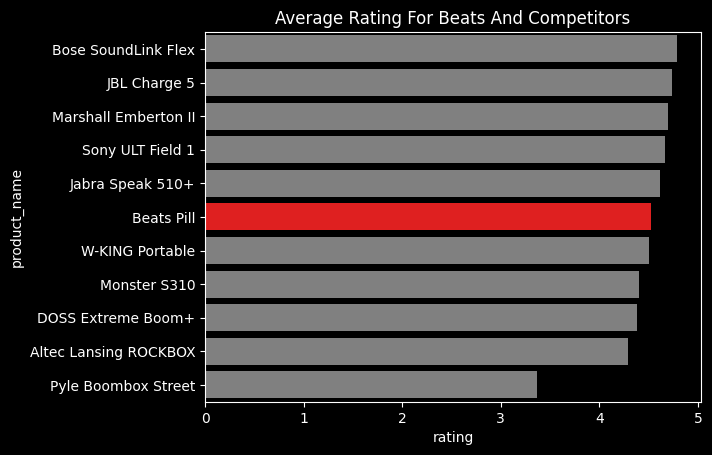

In [ ]:
# bar plot to visualize the average rating for each product.
sns.barplot(avg_rating, x='rating', y='product_name', hue='product_name',
            palette=['red' if x == 'Beats Pill' else 'gray' for x in avg_rating['product_name']])

plt.title("Average Rating For Beats And Competitors");

While the Beats Pill has a high average rating, it ranks sixth among its competitors, highlighting the strong competition in the Bluetooth speaker market.

In [ ]:
# Calculating the count of each rating for each product
rating_by_product = clean_df.groupby('rating')['product_name'].value_counts().unstack()

# Create a color mapping dictionary for the brand names
color_map = {brand: 'red' if brand == 'Beats Pill' else 'gray' for brand in clean_df['product_name']}

fig = px.bar(rating_by_product, color_discrete_map=color_map)

# modifying the layout
fig.update_layout(
    barmode='group',
    width=1200,
    height=500,
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(
        x=-0.3,
        y=1,
        bgcolor="LightSteelBlue"
    ),
    title=dict(text="Ratings Distribution by Product",
               font=dict(color="white", size=18)
        ),

    yaxis_title='Count'
)

fig.show()

Beats Pill is demonstrating a strong performance, but there is still potential for growth and improvement, particularly in addressing the low ratings. Notably, the number of 1-star ratings surpasses that of 2-star ratings

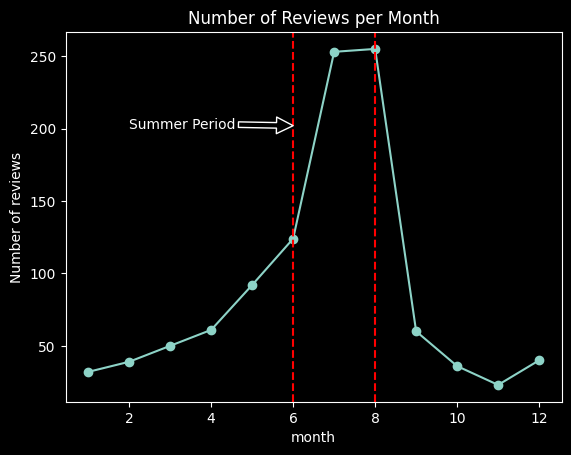

In [ ]:
# extracting the month from date to plot reviews trend
clean_df['month'] = pd.to_datetime(clean_df['date']).dt.month

# Calculating the number of reviews for each month
clean_df.groupby('month')['review_id'].count().plot(
    marker='o', title='Number of Reviews per Month'
    )

# vertical lines for the start and end of the summer season
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=8, color='red', linestyle='--')

# adding annotation
plt.annotate('Summer Period', xy=(6, 202), xytext=(2, 200),
             arrowprops=dict(facecolor='black'))

plt.ylabel('Number of reviews');

July and August have the most reviews, suggesting that people buy Bluetooth speakers more frequently during the summer. This could be because they use them during vacations, outdoor activities, or parties.

### 3.3 Correlation Analysis


In [ ]:
# Calculte the length of reviews
clean_df['review_length'] = clean_df['content'].apply(lambda x: len(x.split()))

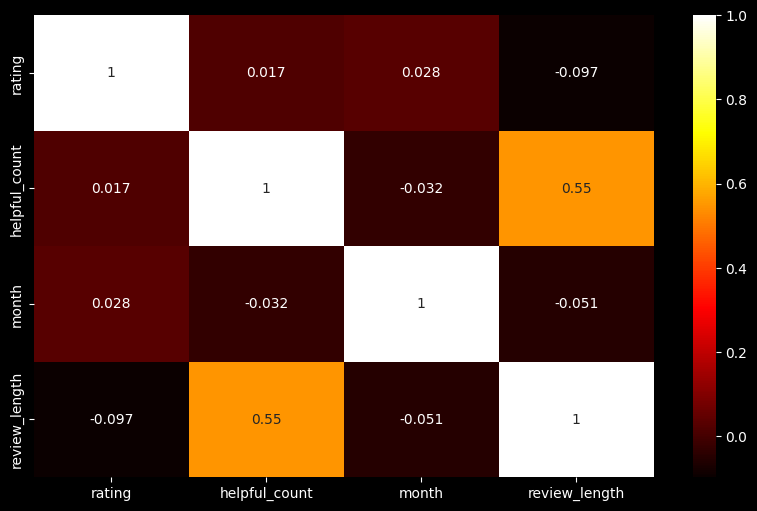

In [ ]:
# Create a heatmap to display the correlation between numeric features
numerical_cols = clean_df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='hot');

There is a positive correlation between `review_length` and `helpful count` suggesting that users tend to find detailed reviews more helpful.

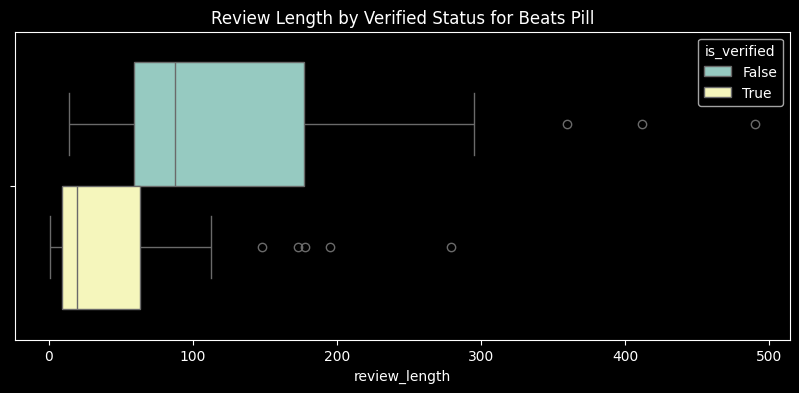

In [ ]:
# Comparing review lengths for verified and unverified users of Beats Pill
plt.figure(figsize=(10,4))

sns.boxplot(
    clean_df[clean_df['product_name']=='Beats Pill'], x='review_length',
                                                      hue='is_verified')

plt.title('Review Length by Verified Status for Beats Pill');

Vine reviewers tend to give more detailed reviews, which other users find helpful. That's why brands rely on their reviews during early product launches to drive more sales.

### 3.4 Word Clouds

Since the titles are short and less detailed, I'll combine them with the content to get a better overall sentiment for each review.

In [ ]:
clean_df['full_review'] = clean_df['title'] + ' ' + clean_df['content']

Creating a function that cleans text reviews

In [ ]:
def clean_text(text):

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    text = contractions.fix(text)

    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

clean_df['clean_review'] = clean_df['full_review'].apply(clean_text)

Split the data into Beats Pill and competitor products for comparison (all products are Bluetooth speakers).

In [ ]:
beats = clean_df[clean_df['product_name'] == 'Beats Pill'].reset_index(drop=True)
competitors = clean_df[clean_df['product_name'] != 'Beats Pill'].reset_index(drop=True)

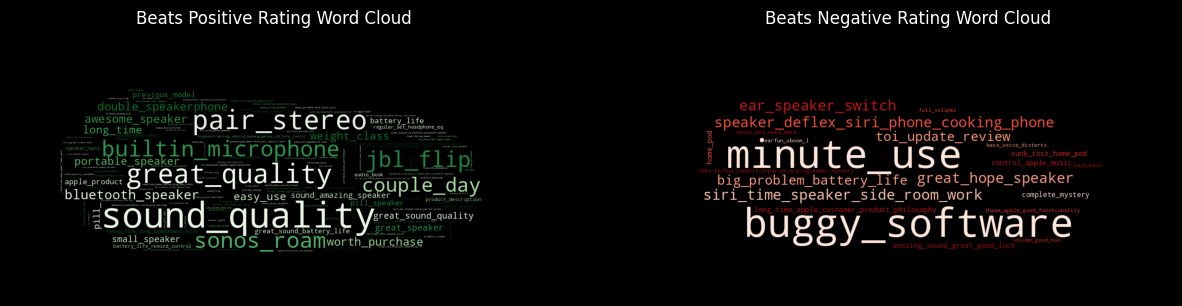

In [ ]:
# Extracting high and low rating reviews for Beats and competitors
beats_pos_sent = beats[beats.rating >= 4]
beats_neg_sent = beats[beats.rating <= 2]

competitors_pos_sent = competitors[competitors.rating >= 4]
competitors_neg_sent = competitors[competitors.rating <= 2]

# Join clean text into a single string for Beats and competitors
beats_pos_text = [text for text in beats_pos_sent.clean_review]
beats_neg_text = [text for text in beats_neg_sent.clean_review]

competitors_pos_text = [text for text in competitors_pos_sent.clean_review]
competitors_neg_text = [text for text in competitors_neg_sent.clean_review]

# Creating a mask for the beats product
mask = np.array(Image.open('beatspill.png'))
mask = np.where(mask > 3, 255, mask)

# Creating a function to create word clouds
def create_wordclouds(text, colormap, mask=None):
    text = ' '.join(text)
    blob = TextBlob(text)
    bi_grams = ' '.join(
        [phrase.replace(' ', '_') for phrase in blob.noun_phrases])

    wordcloud = WordCloud(min_word_length=4, background_color='black',
                          colormap=colormap, mask=mask, random_state=42).generate(bi_grams)

    return wordcloud


beats_pos_wordcloud = create_wordclouds(beats_pos_text, 'Greens', mask)
beats_neg_wordcloud = create_wordclouds(beats_neg_text, 'Reds', mask)

# Plot word clouds for Beats Pill
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.imshow(beats_pos_wordcloud)
ax1.set_title('Beats Positive Rating Word Cloud')
ax2.imshow(beats_neg_wordcloud)
ax2.set_title('Beats Negative Rating Word Cloud')
ax1.axis('off')
ax2.axis('off')
plt.show()

4-5 star ratings Dominant Terms:
* `sound_quality`
* `great_quality`
* `pill_speaker`
* `pair_stereo`

This highlights positive user experiences related to audio output, style, specific features like the built-in microphone, and overall product quality.

1-2 star ratings Dominant Terms:
* `buggy_software`
* `minute_use`

Customers are frustrated with software-related issues, and the presence of words like 'Siri', 'update', and 'switch' suggests problems with connectivity and updates. The battery is mentioned in both low and high-rated reviews.

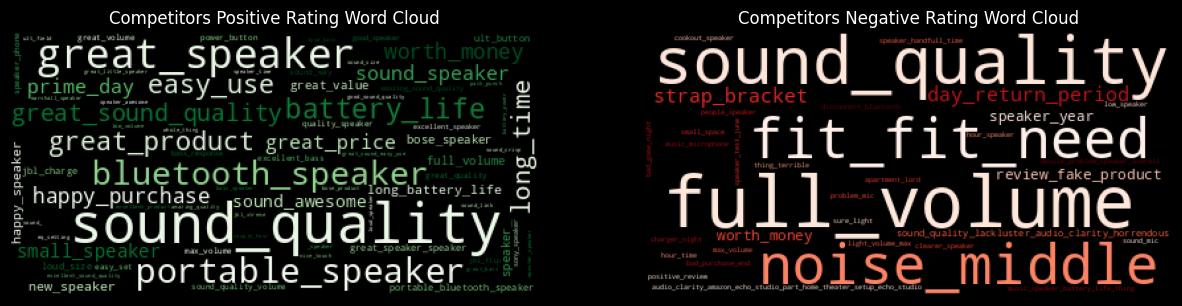

In [ ]:
competitors_pos_wordcloud = create_wordclouds(competitors_pos_text, 'Greens')
competitors_neg_wordcloud = create_wordclouds(competitors_neg_text, 'Reds')

# Plot word clouds for competitors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.imshow(competitors_pos_wordcloud)
ax1.set_title('Competitors Positive Rating Word Cloud')
ax2.imshow(competitors_neg_wordcloud)
ax2.set_title('Competitors Negative Rating Word Cloud')
ax1.axis('off')
ax2.axis('off')
plt.show()

4-5 star ratings Dominant Terms:

* Similar to Beats, terms like 'sound_quality', 'portable_speker' appear the most, suggesting that these aspects satisfy customers, in addition to price.

1-2 star ratings Dominant Terms:

*  We can see `sound quality` is dominant in both low and high star ratings, and mentions of `noise` and `full volume` could indicate unwanted sounds at higher volumes.

* Customers have expressed frustration with 'customer support' and 'day return period' pointing to after sale service problems.

## 4. Sentiment Analysis




### 4.1 Methodology

This project employed two distinct sentiment analysis techniques to gain a comprehensive understanding of customer opinions:

4.1.1 **Text Blob**

TextBlob utilizes a lexicon-based approach, assigning sentiment scores to individual words and phrases based on a pre-defined dictionary. It then calculates the overall sentiment polarity (positive, negative, or neutral) and subjectivity (how opinionated the text is) of a given text.

In [ ]:
def sent_analysis_textblob(df, text_col):

    polarity_scores = []
    sent_categories = []

    for text in df[text_col]:
        text_blob = TextBlob(text)
        polarity = text_blob.sentiment.polarity

        polarity_scores.append(polarity)

        if polarity > 0:
            sent_categories.append('positive')
        elif polarity < 0:
            sent_categories.append('negative')
        else:
            sent_categories.append('neutral')

    return polarity_scores, sent_categories

In [ ]:
polarity_scores, sent_categories = sent_analysis_textblob(
    clean_df, 'clean_review')

# Adding new columns to our clean DataFrame to store the polarity scores and sentiment categories.
clean_df['polarity_score'] = polarity_scores
clean_df['textblob_sent_category'] = sent_categories

4.1.2 **Roberta base model**

`cardiffnlp/twitter-roberta-base-sentiment-latest` is a pre-trained RoBERTa model fine-tuned specifically for sentiment analysis on Twitter data.

RoBERTa is a transformer-based language model that leverages deep learning to understand the context and meaning of words in a sentence. It has been trained on a massive dataset of text, allowing it to capture complex language patterns and nuances.

In [ ]:
def sent_analysis_roberta(df, model):

    sentimentAnalysis = pipeline('text-classification', model=model,
                                 tokenizer=model, max_length=512, truncation=True)

    sent_analysis_output = []

    for review in df.full_review:
        sent_analysis_output.append(sentimentAnalysis(review))

    df['Roberta_score'] = [sent[0]['score'] for sent in sent_analysis_output]

    df['Roberta_sent_cat'] = [sent[0]['label'] for sent in sent_analysis_output]

    return df

In [ ]:
clean_df = sent_analysis_roberta(
    clean_df, model='cardiffnlp/twitter-roberta-base-sentiment-latest')

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

### 4.2 Results


4.2.1 **Text Blob**

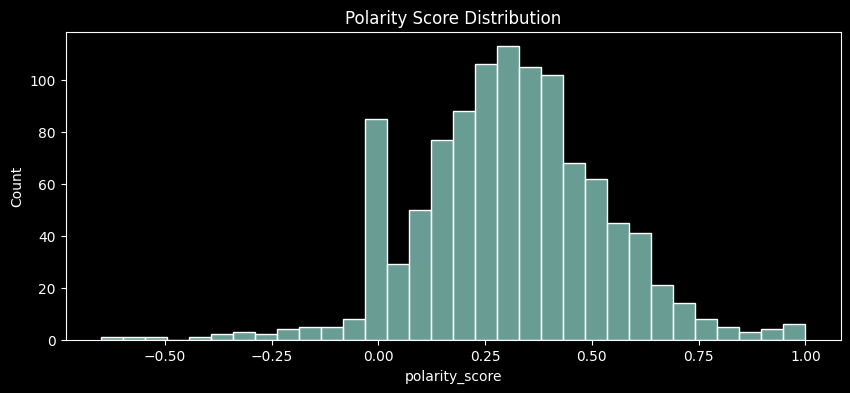

In [ ]:
# Visualizing the distribution of polarity score
plt.figure(figsize=(10,4))
sns.histplot(clean_df['polarity_score'])
plt.title('Polarity Score Distribution');

TextBlob, while generally showing a positive skew in customer sentiment, tends to assign a significant proportion of neutral sentiment scores, as evidenced by the noticeable peak at 0, and does not show a shift towards extreme positivity.

In [ ]:
beats = clean_df[clean_df['product_name'] == 'Beats Pill']
competitors = clean_df[clean_df['product_name'] != 'Beats Pill']

In [ ]:
beats_sentiment_proportions = beats.textblob_sent_category.value_counts(normalize=True)

competitors_sentiment_proportions = competitors.textblob_sent_category.value_counts(normalize=True)

print(f"Beats sentiment: {beats_sentiment_proportions}\n")
print(f"Competitors sentiment: {competitors_sentiment_proportions}")

Beats sentiment: textblob_sent_category
positive    0.927083
neutral     0.041667
negative    0.031250
Name: proportion, dtype: float64

Competitors sentiment: textblob_sent_category
positive    0.896801
neutral     0.062951
negative    0.040248
Name: proportion, dtype: float64


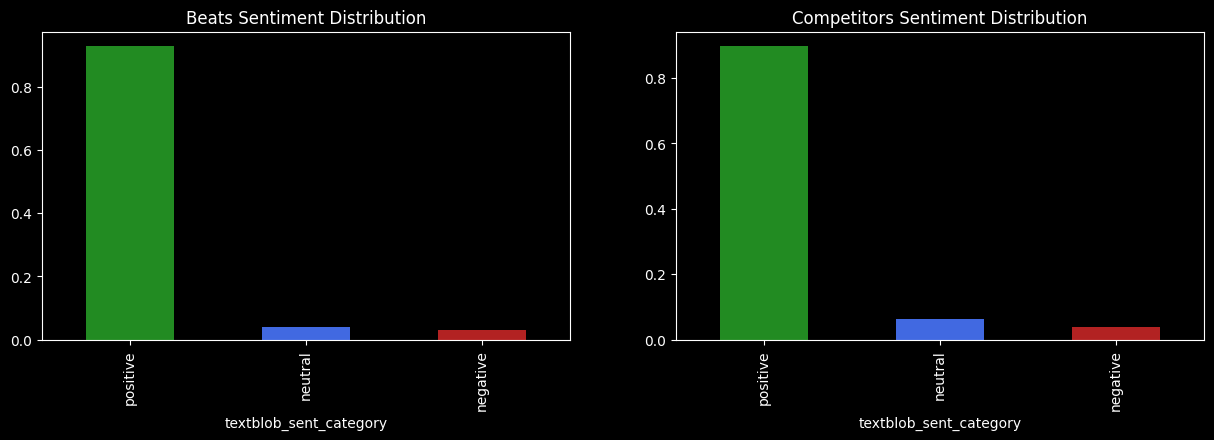

In [ ]:
# Visualizing the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

colors = ['forestgreen', 'royalblue', 'firebrick']

beats_sentiment_proportions.plot(
    kind='bar', ax=ax1, title='Beats Sentiment Distribution', color=colors)

competitors_sentiment_proportions.plot(
    kind='bar', ax=ax2, title='Competitors Sentiment Distribution', color=colors);

Beats Pill had a slightly higher proportion of positive sentiment (92.7%) compared to competitors (89.7%). Both had relatively low negative sentiment, indicating strong customer satisfaction.

Competitors had a slightly higher proportion of neutral sentiment (6.3%) compared to Beats Pill (4%).

## Roberta base model

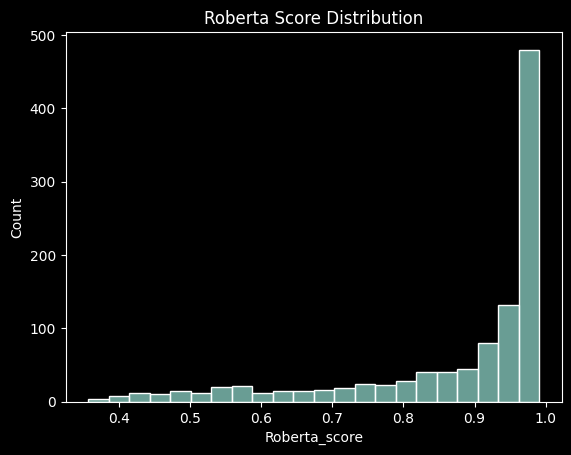

In [ ]:
# Visualizing the distribution of roberta score
sns.histplot(clean_df['Roberta_score'])
plt.title('Roberta Score Distribution');

Roberta scores, ranging from 0 to 1, represent the model's confidence in assigning a review to a specific sentiment class (positive, negative, or neutral). A higher score indicates greater confidence in that classification.

In [ ]:
beats_norm = beats.Roberta_sent_cat.value_counts(normalize=True)

competitors_norm = competitors.Roberta_sent_cat.value_counts(normalize=True)

print(f"Beats sentiment: {beats_norm}\n")
print(f"Competitors sentiment: {competitors_norm}")

Beats sentiment: Roberta_sent_cat
positive    0.854167
negative    0.104167
neutral     0.041667
Name: proportion, dtype: float64

Competitors sentiment: Roberta_sent_cat
positive    0.792570
negative    0.126935
neutral     0.080495
Name: proportion, dtype: float64


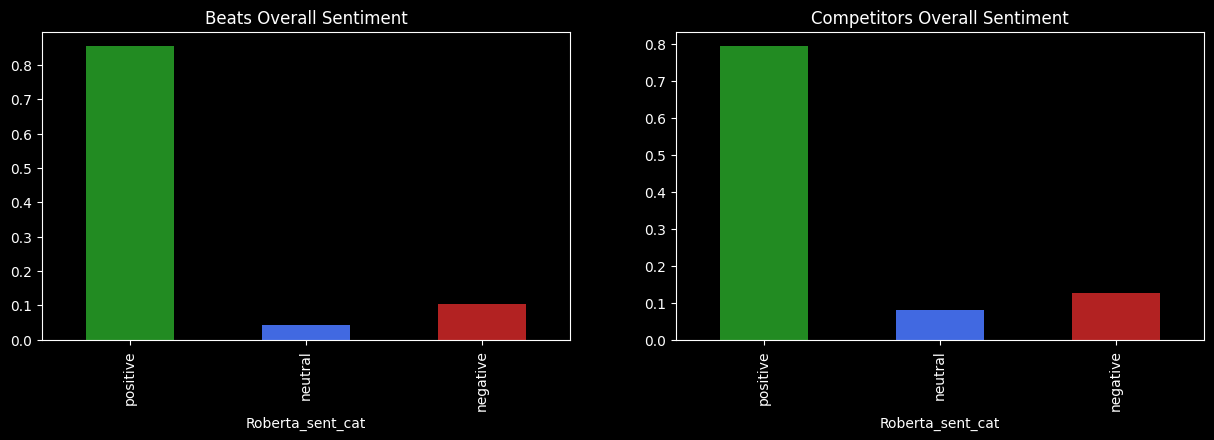

In [ ]:
# Visualizing the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

colors = ['forestgreen', 'royalblue', 'firebrick']

beats_norm.reindex(['positive', 'neutral', 'negative']).plot(
    kind='bar', ax=ax1, title='Beats Overall Sentiment', color=colors)

competitors_norm.reindex(['positive', 'neutral', 'negative']).plot(
    kind='bar', ax=ax2, title='Competitors Overall Sentiment', color=colors);

Beats has a high proportion of positive sentiment (85.42%), with 10.42% of reviews showing negative sentiment and 4.17% categorized as neutral.

Competitors, while still having a strong positive sentiment (79.26%), show a lower proportion of positive reviews compared to Beats. They also have a slightly higher proportion of negative sentiment (12.69%) and a larger neutral category (8%).

## 5. AI-Generated Insights

### 5.1 Using Gemini AI

Gemini AI was employed to extract insights from Beats Pill customer reviews. First, reviews were categorized as positive or negative based on the sentiment labels predicted by the RoBERTa model. These reviews were then converted into lists for input for the Gemini AI. Then, a "persona" was set for the AI, framing it as a data-driven product strategist specializing in audio products. Specific prompts were crafted to guide the AI's analysis, such as identifying product strengths and weaknesses. The AI processed these prompts along with the reviews, generating text responses that were then examined to extract key insights and actionable recommendations for Beats.

In [ ]:
all_reviews = beats.full_review.to_list()

# Filtering and converting positive reviews to a list
pos_reviews = beats[beats.Roberta_sent_cat == 'positive'].full_review.to_list()

# Filtering and converting negative reviews to a list
neg_reviews = beats[beats.Roberta_sent_cat == 'negative'].full_review.to_list()

In [ ]:
# API key generated from Google AI Studio
api_key = "Your_Google_AI_studio_API"

Providing context significantly improves the output of LLMs. By assigning a specific role, we guide the AI's responses and ensure they are relevant to the desired task.

In [ ]:
history = [{
      "role": "user",
      "parts": [
        "You are a data-driven product strategist with over 10 years of \
        experience in consumer audio products, specializing in Bluetooth speakers.\
        You have a deep understanding of consumer preferences and market trends,\
        and you use data analysis tools and AI to derive actionable insights.",
      ],
    }]

This function sends a prompt consisting of a task description and the provided reviews to the Gemini API and returns the AI's response.

In [ ]:
def analyze_reviews(reviews, api_key, history, prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-pro-002",
        generation_config={
            "temperature": 0,
            "top_p": 0.95,
            "top_k": 25,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=history)

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

### 5.2 Key Insights


In [ ]:
prompt_1 = 'These are reviews of the Beats Pill product, where the overall\
sentiment of consumer reviews is negative. Analyze these reviews in detail\
and identify the product features that consumers are most dissatisfied with.\
Write your analysis clearly and concisely in markdown format, providing evidence\
or quotes from the reviews.'

#insights = analyze_reviews(neg_reviews, api_key, history, prompt_1)
#print(insights)

**Insights Generated**

---

## Beats Pill Negative Review Analysis

Several recurring complaints centered around key product features:

**1. Software/Connectivity Issues:**

* **Random Power Cycling:** Multiple reviewers report the speaker unexpectedly turning off after short periods (30-40 minutes), even when fully charged.  "Switches off quickly and unexpectedly even when fully charged...Sometimes this happens in less than 30 min..." This severely impacts usability and contradicts advertised battery life.
* **Siri Integration Problems:**  The speaker seems to interfere with Siri functionality on the user's phone. "If you try to use Siri, you have to be right next to the speaker...So if you’re cooking and your phone is next to you...and the speaker is on the other side of the room it won’t work..." This suggests a conflict in microphone usage or Bluetooth connectivity.
* **Difficult Bluetooth Connection:** One user experienced difficulty connecting via Bluetooth, contradicting the "one-touch connect" feature. "The 'one touch connect' feature did not work, I had to manually connect in my Bluetooth settings (Android, Samsung Galaxy S20 FE)." This indicates potential compatibility issues or flaws in the advertised quick-connect functionality.
* **Lack of App Support/Control:**  Users express frustration with the lack of an iOS app and limited functionality of the Android app. "No App for IOS...Also, Apple does NOT have an IOS version of Beats that will support the Beats Pill 2024."  This restricts user control over features and customization.  Another user states the Android app is essentially useless: "Speaking of the Beats app, it doesn't really have any use. It will tell you battery life, and remind you what the controls are, but that's it."
* **Uncontrollable Startup/Shutdown Sounds:** The loud startup and shutdown sounds are a major annoyance, with no apparent way to disable them. "No way to disable loud startup/poweroff tones...The speaker makes a very loud startup and power down sound. NO way to turn them off." This negatively impacts the user experience, especially in quiet environments.

**2. Sound Quality/Profile:**

* **Overly Bass-Heavy Sound:**  The overwhelming bass response is a common complaint, making the speaker unsuitable for certain audio content. "Bass Heavy...That's fine for songs that complement that kind of sound, but is a determent to anything else. For example listening to an audio book it doesn't sound very good..." This suggests a lack of balanced audio output and limited versatility.
* **Mono Sound:** Despite its wide design, the speaker delivers mono sound, disappointing users expecting a stereo experience. "Great sound, but MONO ruins it!...not having any stereo image from a speaker this wide is just silly..." This design choice contradicts the expectation set by the speaker's physical form factor.
* **Distortion at High Volume:** Sound quality reportedly degrades at higher volumes. "Overpriced...anything above that starts to immediately diminish the sound quality." This limits the speaker's effectiveness in larger spaces or outdoor settings.

**3. Hardware/Design:**

* **Difficult-to-Use Buttons:** The physical buttons are described as hard to see and distinguish. "...four buttons...They are the same color as the speaker, do not light up, and are difficult to see." This makes basic operation cumbersome.
* **Missing Charging Cable (in one case):** One reviewer received a product without a charging cable. "Open and no charging cable couldn’t even get just the cable sent" This points to potential quality control issues in packaging and shipping.

**4. Pricing/Value:**

* **Overpriced:** Several reviewers consider the speaker overpriced for the features and performance offered. "Overpriced. Wait for a sale because..." This suggests a mismatch between consumer expectations and perceived value.


These recurring complaints highlight significant issues with the Beats Pill across software functionality, sound quality, and hardware design. Addressing these concerns, particularly the software bugs and sound profile limitations, should be a priority for improving consumer satisfaction and product perception.

In [ ]:
prompt_2 = 'These are reviews of the Beats Pill product, where the overall sentiment \
of consumer reviews is positive. Analyze these reviews in detail and identify \
the product features that consumers are most satisfied with. Write your analysis \
clearly and concisely in markdown format, providing evidence or quotes from the reviews.'

#insights = analyze_reviews(pos_reviews, api_key, history, prompt_2)
#print(insights)

**Insights Generated**

---

## Beats Pill Consumer Review Analysis: Positive Features

**1. Sound Quality (especially Bass):** This is the most frequently praised feature.  Users consistently highlight the impressive sound for a speaker of this size, particularly the bass performance.

* *"HUGE audio punch in a small package - just what you expect from Beats!"*
* *"The bass is absolutely great and overall the speaker is very balanced."*
* *"Sound is crisp clear and the bass doesn't rattle when It bumps"*
* *"The sound quality of this speaker is really great for its size, living up to the Beats name, filling the room with punchy bass and crystal clear sound."*
* *"This speaker has incredible sound and bass for its size."*
* *"Loudest and Best Bluetooth Speaker of this Size"*

While some mention bass distortion at higher volumes, the general consensus is that the bass is strong and enjoyable, especially at lower to mid-range volumes.

**2. Portability and Design:** The compact size and sleek design are major selling points. Users appreciate the portability and the aesthetic appeal of the Pill.

* *"Not bad for the price... the portability factor makes it a keeper."*
* *"The pill is definitely very portable, great performance and most definitely great value for the money."*
* *"This is a very small and compact speaker, but for its size, it packs a serious punch."*
* *"Sleek. Compact. Well built."*
* *"Compact and powerful speaker..."*

**3. Battery Life:**  Many reviewers mention the long battery life as a positive, with some claiming it lasts "all day" or even multiple days at moderate volumes.

* *"Good battery life."*
* *"The battery lasts a long time, even with heavy use."*
* *"Still on the first charge"*
* *"This little speaker battery last all day"*

**4. Apple Ecosystem Integration (for Apple users):**  Those within the Apple ecosystem appreciate the seamless integration with iPhones and other Apple devices, including features like "Find My."

* *"Pairs automatically with Apple devices and can be tracked using Find My."*
* *"If you are in the Apple Ecosystem, this speaker was made for you as it connects to your iPhone the minute you turn it on with a very satisfying screen animation."*
* *"Also if your in the apple eco system it works like AirPods where you can switch between devices and also locate the speaker via find my."*

**5. Durability and Water Resistance:** The IP67 rating provides peace of mind for users who plan to use the speaker outdoors or near water.

* *"Rated IP67 meaning it is dust and water resistant, so you can feel confident taking it to your next beach party or when you are traveling."*
* *"I mostly use this out by the pool, so I like the IP67 water rating."*

**6. Speakerphone Functionality:** The built-in microphone allows for hands-free calling, a feature that some reviewers found surprisingly useful.

* *"But what sets this speaker apart, and one of the main reasons why I bought it, is that it also doubles as a speakerphone!!!"*
* *"One feature we did not think we would use but really like is the speaker phone function."*


**7. Lossless Audio over USB-C:** While not extensively mentioned, the ability to play lossless audio via USB-C connection is highlighted as a positive by some users.

* *"Yes IT HAS LOSSLESS AUDIO THROUGH USB-C!"*


These are the key features driving positive sentiment towards the Beats Pill. While some criticisms exist (primarily regarding bass distortion at high volumes and button controls), the overall reception is favorable, with users finding the speaker to be a valuable and enjoyable audio companion.

In [ ]:
prompt_3 = 'Based on the following reviews of the Beats Pill product, suggest \
potential improvements to address consumer concerns. Use examples from both \
positive and negative feedback to guide your suggestions.'

#insights = analyze_reviews(all_reviews, api_key, history, prompt_3)
#print(insights)

**Insights Generated**

---

## Actionable Improvements Based on Consumer Feedback

After analyzing the reviews, several key areas for improvement emerge for the Beats Pill.  My recommendations leverage both positive and negative feedback to create a more compelling product.

**1. Software Stability and Unexpected Shutdowns:**

* **Problem:** Multiple reviews cite random shutdowns, even when fully charged, after 30-40 minutes of use. This points to a critical software bug requiring immediate attention.
* **Solution:**  Prioritize debugging and releasing a firmware update to address this core functionality issue.  Implement robust logging within the firmware to capture data leading up to shutdowns, enabling faster diagnosis and resolution.  Consider a beta testing program to identify and fix issues before widespread release.

**2.  Bass Distortion at High Volumes:**

* **Problem:**  While praised for its bass at lower volumes, several reviewers note distortion at higher volumes. This suggests limitations in the driver or sound processing.
* **Solution:** Investigate the cause of distortion.  Potential solutions include:
    * Refining the DSP (Digital Signal Processing) to better manage bass frequencies at high output levels.
    * Exploring hardware adjustments, such as a passive radiator (as suggested by a reviewer), to improve bass response without distortion.
    * Implementing a dynamic loudness feature that adjusts EQ based on volume to maintain balanced sound.

**3.  Develop a Dedicated Beats App (iOS and Android):**

* **Problem:**  Lack of a dedicated app limits user control and customization.  The existing Pill+ app is incompatible.
* **Solution:**  Develop a comprehensive app offering:
    * Firmware updates and release notes.
    * Customizable EQ settings to tailor sound profiles.
    * Microphone source selection for Siri and calls.
    * Stereo pairing management and advanced controls.
    * Battery life indicator and charging status.
    * Product tutorials and FAQs.

**4.  Improve Button Functionality and User Interface:**

* **Problem:**  Users find the button combinations for power and other functions confusing and unintuitive.  Lack of dedicated buttons for essential functions like track control is also a concern.
* **Solution:**
    * Simplify button combinations for power on/off.  Consider a dedicated power button.
    * Add dedicated track control buttons or explore alternative input methods (e.g., touch controls).
    * Improve the instruction manual and in-app tutorials to clearly explain button functionality.

**5.  Address Loud Startup/Shutdown Tones:**

* **Problem:**  Users complain about excessively loud startup and shutdown tones with no way to disable them.
* **Solution:**  Implement a volume control or a disable option for these tones within the Beats app (see recommendation #3) or through the device's button interface.

**6.  Durability Concerns:**

* **Problem:**  One reviewer mentioned the speaker grill denting easily.

* **Solution:**  Investigate the grill material and design.  Explore more durable materials or reinforcement to prevent dents.

**Leveraging Positive Feedback:**

The positive reviews highlight the Pill's excellent sound quality at lower volumes, portability, attractive design, and seamless Apple device integration.  These strengths should be maintained and further enhanced through the proposed improvements.  The positive feedback around lossless audio via USB-C is a strong differentiator and should be emphasized in marketing materials.

By addressing these issues, Beats can significantly improve the user experience and solidify the Pill's position as a leading portable Bluetooth speaker.  A data-driven approach, continuous monitoring of user feedback, and iterative improvements will be crucial for long-term success.

In [ ]:
prompt_4 = 'From the reviews, categorize customers based on their usage patterns \
and specific needs. What different groups of consumers are attracted to the \
Beats Pill, and how do their requirements vary?'

#insights = analyze_reviews(all_reviews, api_key, history, prompt_4)
#print(insights)

**Insights Generated**

---
\
Based on the reviews, I've categorized Beats Pill customers into the following groups, highlighting their varying needs and usage patterns:

**1. Apple Ecosystem Users:** These customers are deeply embedded in the Apple world and value seamless integration.

* **Needs:** Effortless pairing, "Find My" compatibility, potential synergy with other Apple devices and services.
* **Usage:** Everyday listening, casual home use, taking calls, potentially using with Apple TV.
* **Frustrations:** Lack of a dedicated iOS Beats app, loud startup/shutdown tones they can't disable.

**2. Audiophiles/Sound Quality Seekers:** This group prioritizes high-fidelity audio and rich bass.

* **Needs:** Clear highs, punchy mids, deep bass without distortion, potentially lossless audio capabilities.
* **Usage:** Critical music listening, enjoying a full sound experience, potentially using for gaming handhelds via wired connection.
* **Frustrations:** Bass distortion at higher volumes, lack of EQ adjustments, muddy bass at times.

**3. Portability Enthusiasts:** These users want a compact, durable speaker for on-the-go listening.

* **Needs:** Small form factor, long battery life, water resistance, easy portability.
* **Usage:** Travel, beach trips, outdoor activities, parties, using in different rooms around the house.
* **Frustrations:** Dust/hair attraction on the silicone back.

**4. Budget-Conscious Buyers:** This group seeks good value for their money.

* **Needs:** Affordable price point, decent sound quality, acceptable battery life.
* **Usage:** Casual listening, general home use.
* **Frustrations:** Price considered high compared to some competitors, sound quality degradation at higher volumes.

**5. Speakerphone Users:** These customers value the built-in microphone for calls.

* **Needs:** Clear call quality, convenient hands-free communication.
* **Usage:** Work calls, conference calls, casual calls.
* **Frustrations:** None specifically mentioned, but microphone quality is a key factor for this group.

**6. Multi-Device Users (Android & Apple):** This segment uses both Android and Apple devices.

* **Needs:** Seamless switching between operating systems, consistent performance across platforms.
* **Usage:** Listening to music from various devices, taking calls on different phones.
* **Frustrations:** Potential connectivity issues, although most reviews indicate smooth pairing with both Android and Apple.


**Key Insights and Recommendations:**

* **Software Improvement:** Address the buggy software causing random shutdowns and Siri integration issues.  Prioritize fixing the loud, unadjustable power on/off tones.
* **iOS App Development:** Create a dedicated iOS app for the Pill to address the ecosystem users' needs for EQ adjustments, tone control, and firmware updates.
* **Bass Refinement:** Investigate and mitigate the bass distortion issues at higher volumes, potentially through hardware or software adjustments. Consider adding a user-adjustable EQ.
* **Marketing Focus:** Tailor marketing messages to highlight the strengths for each segment. For example, emphasize portability and durability for outdoor enthusiasts, sound quality and Apple integration for ecosystem users, and speakerphone functionality for business users.


By understanding these distinct customer segments and their specific needs, Beats can better tailor product development, marketing, and customer support to maximize user satisfaction and drive sales.

### 5.3 Interpretation

Gemini AI was instrumental in analyzing customer reviews and extracting valuable insights about the Beats Pill. Here's a summary of the key findings:

### **Prompt 1 (Negative Sentiment):**

* **Software/Connectivity Issues:** The AI identified random shutdowns, Siri integration problems, difficult Bluetooth connections, lack of app support, and uncontrollable startup/shutdown sounds as major pain points. This highlights the need for Beats to prioritize software stability and user experience.

* **Sound Quality/Profile:** Overly bass-heavy sound, mono output despite a wide design, and distortion at high volumes were identified as recurring complaints. This suggests a need for a more balanced sound profile and better audio performance at higher volumes.

* **Hardware/Design:** Difficult-to-use buttons and a reported case of a missing charging cable point to potential usability and quality control issues.

* **Pricing/Value:** The AI echoed the sentiment that the Beats Pill is often perceived as overpriced for its features and performance.

### **Prompt 2 (Positive Sentiment):**

* **Sound Quality (Bass):** The AI confirmed that the powerful bass is a key driver of positive sentiment, although some users noted distortion at high volumes.

* **Portability and Design:** The compact size and sleek design were highlighted as major selling points.

* **Battery Life:** Long battery life was consistently praised.

* **Apple Ecosystem Integration:** Seamless integration with Apple devices, including "Find My" functionality, was a significant positive for Apple users.

* **Durability and Water/Dust Resistance:** The IP67 rating was appreciated for outdoor use.

* **Speakerphone Functionality:** The built-in microphone for hands-free calling was a welcome feature.

* **Lossless Audio over USB-C:** The ability to play lossless audio was a positive, though not widely mentioned.

### **Prompts 3 & 4 (Improvements and Customer Segmentation):**

* **Actionable Improvements:** The AI suggested specific improvements based on the feedback, including addressing software bugs, refining the bass profile, developing a dedicated app, improving button functionality, and exploring a budget-friendly variant.

* **Customer Segmentation:** The AI identified six distinct customer segments: Apple Ecosystem Users, Audiophiles, Portability Enthusiasts, Budget-Conscious Buyers, Speakerphone Users, and Multi-Device Users. This segmentation highlights the need for targeted marketing messages and product development strategies.


These insights are highly relevant to Beats by Dre as they provide a data-driven understanding of:

* **Customer Perceptions:** What users like and dislike about the Beats Pill.

* **Product Strengths and Weaknesses:** Areas where the Pill excels and where it falls short.

* **Target Audience Segmentation:** The different types of customers who are attracted to the Pill and their specific needs.

* **Actionable Recommendations:** Concrete steps that Beats can take to improve the product, marketing, and customer experience.

## 6. Comparative Analysis

### 6.1 Competitor Overview
These are the top competitors (according to amazon avg ratings) analyzed with a brief overview of their market positioning.

| Product | Target Audience | Positioning | Strengths | Weaknesses |
|---|---|---|---|---|
| **Bose SoundLink Flex** | - Indoor and outdoor useers | - Premium<br>- ultra-portable Bluetooth speaker<br> - prioritizing durability, versatility, and high-quality audio. | - Balanced sound quality<br>- Rugged design<br>- Long battery life<br>- Ease of use. | - Connectivity issues<br>- Lack of stereo pairing<br>- Button usability<br>- Premium price point. |
| **JBL Charge 5** | - Younger audience<br>- Those who prioritize loudness and portability. | - Party-friendly speaker<br>- powerful bass<br> - long battery life. | - Powerful bass<br>- Long battery life<br>- Portability<br>- Durability<br>- Ease of use<br>- Charging capability. | - Limited bass and treble control<br>- Inconsistencies with PartyBoost feature<br>- Carrying case durability. |
| **Marshall Emberton II** | - Users who value aesthetics and a classic rock sound. | - Distinctive retro design. | - Excellent sound quality<br>- Classic design<br>- Portability<br>- Good battery life. | - Android app compatibility issues<br>- Bluetooth connectivity reliability<br>- Control button issues. |
| **Sony ULT Field 1** | - Outdoor enthusiasts<br>- Bass lovers. | - Portable and rugged speaker<br> - Extra bass via the "ULT" button. | - Impressive sound quality with powerful bass<br>- Compact size<br>- Included strap for portability<br>- Durable and water-resistant<br>- Easy Bluetooth pairing and app integration. | - Inconsistent bass and treble<br>- Muffled sound at times<br>- Low maximum volume<br>- Shorter-than-advertised battery life<br>- High price point. |
| **Jabra Speak 510+** | - Professionals<br>- Conference call users. | - Designed for conference calls and professional use<br>- emphasizing clear audio<br> - ease of use. | - Excellent sound quality for calls<br>- Ease of use<br>- Portability<br>- Effective microphone<br>- Good battery life<br>- Compatibility with various platforms<br>- Dedicated mute button<br>- Value for money. | - Audio quality issues (crackling/static noise)<br>- Durability concerns<br>- Bluetooth connectivity and usability issues<br>- Quality control/cosmetic defects. |

### 6.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

In [ ]:
top_brands = ['Bose SoundLink Flex', 'JBL Charge 5', 'Beats Pill',
              'Marshall Emberton II', 'Sony ULT Field 1',
              'Jabra Speak 510+']

filtered_df = clean_df[clean_df['product_name'].isin(top_brands)]

sentiment_data = filtered_df.groupby('product_name')\
 ['Roberta_sent_cat'].value_counts(normalize=True).unstack()

sentiment_summary = sentiment_data.T.reindex(
    ['positive', 'neutral', 'negative'])

print(sentiment_summary.to_markdown())

| Roberta_sent_cat   |   Beats Pill |   Bose SoundLink Flex |   JBL Charge 5 |   Jabra Speak 510+ |   Marshall Emberton II |   Sony ULT Field 1 |
|:-------------------|-------------:|----------------------:|---------------:|-------------------:|-----------------------:|-------------------:|
| positive           |    0.854167  |              0.920792 |           0.75 |          0.873418  |              0.858696  |               0.81 |
| neutral            |    0.0416667 |              0.029703 |           0.21 |          0.0506329 |              0.119565  |               0.1  |
| negative           |    0.104167  |              0.049505 |           0.04 |          0.0759494 |              0.0217391 |               0.09 |


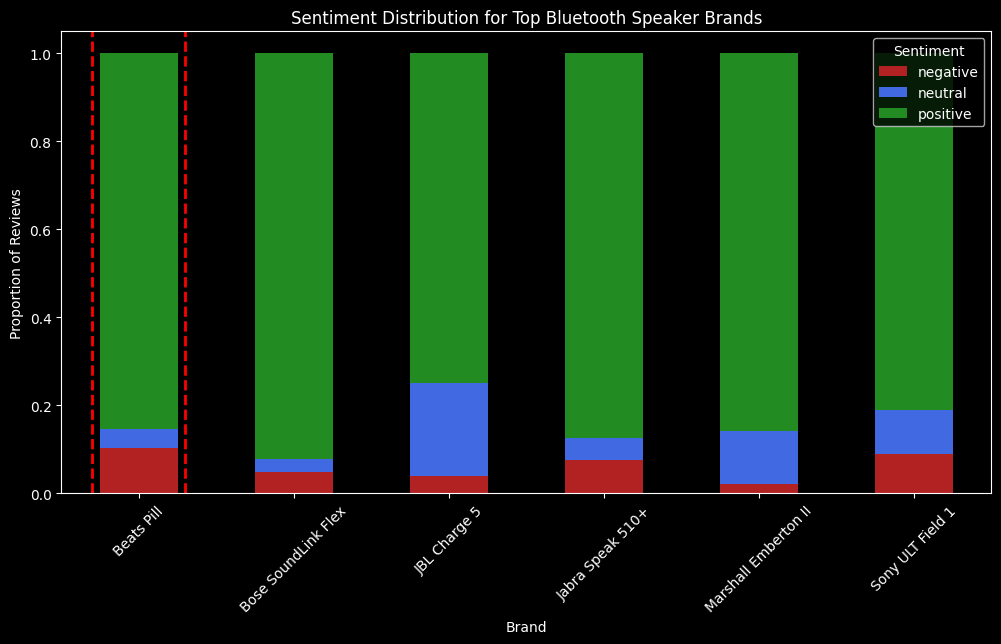

In [ ]:
colors = ['firebrick', 'royalblue', 'forestgreen']

sentiment_data.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))
plt.title('Sentiment Distribution for Top Bluetooth Speaker Brands')
plt.xlabel('Brand')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

beats_pill_pos = sentiment_data.index.get_loc('Beats Pill')

plt.axvline(x=beats_pill_pos - 0.3, color='Red', linestyle='--', linewidth=2)
plt.axvline(x=beats_pill_pos + 0.3, color='Red', linestyle='--', linewidth=2);

**Beats Pill** shows strong positive sentiment but also has the highest negative sentiment among top competitors. **Bose SoundLink Flex** outperforms Beats Pill with higher positive and lower negative scores. Overall, Beats Pill performs well in positive sentiment but faces strong competition, particularly from Bose SoundLink Flex, and could benefit from efforts to reduce negative sentiment.

### 6.3 SWOT Analysis

Strengths, Weaknesses, Opportunities, Threats analysis for Beats by Dre based on the comparative data.

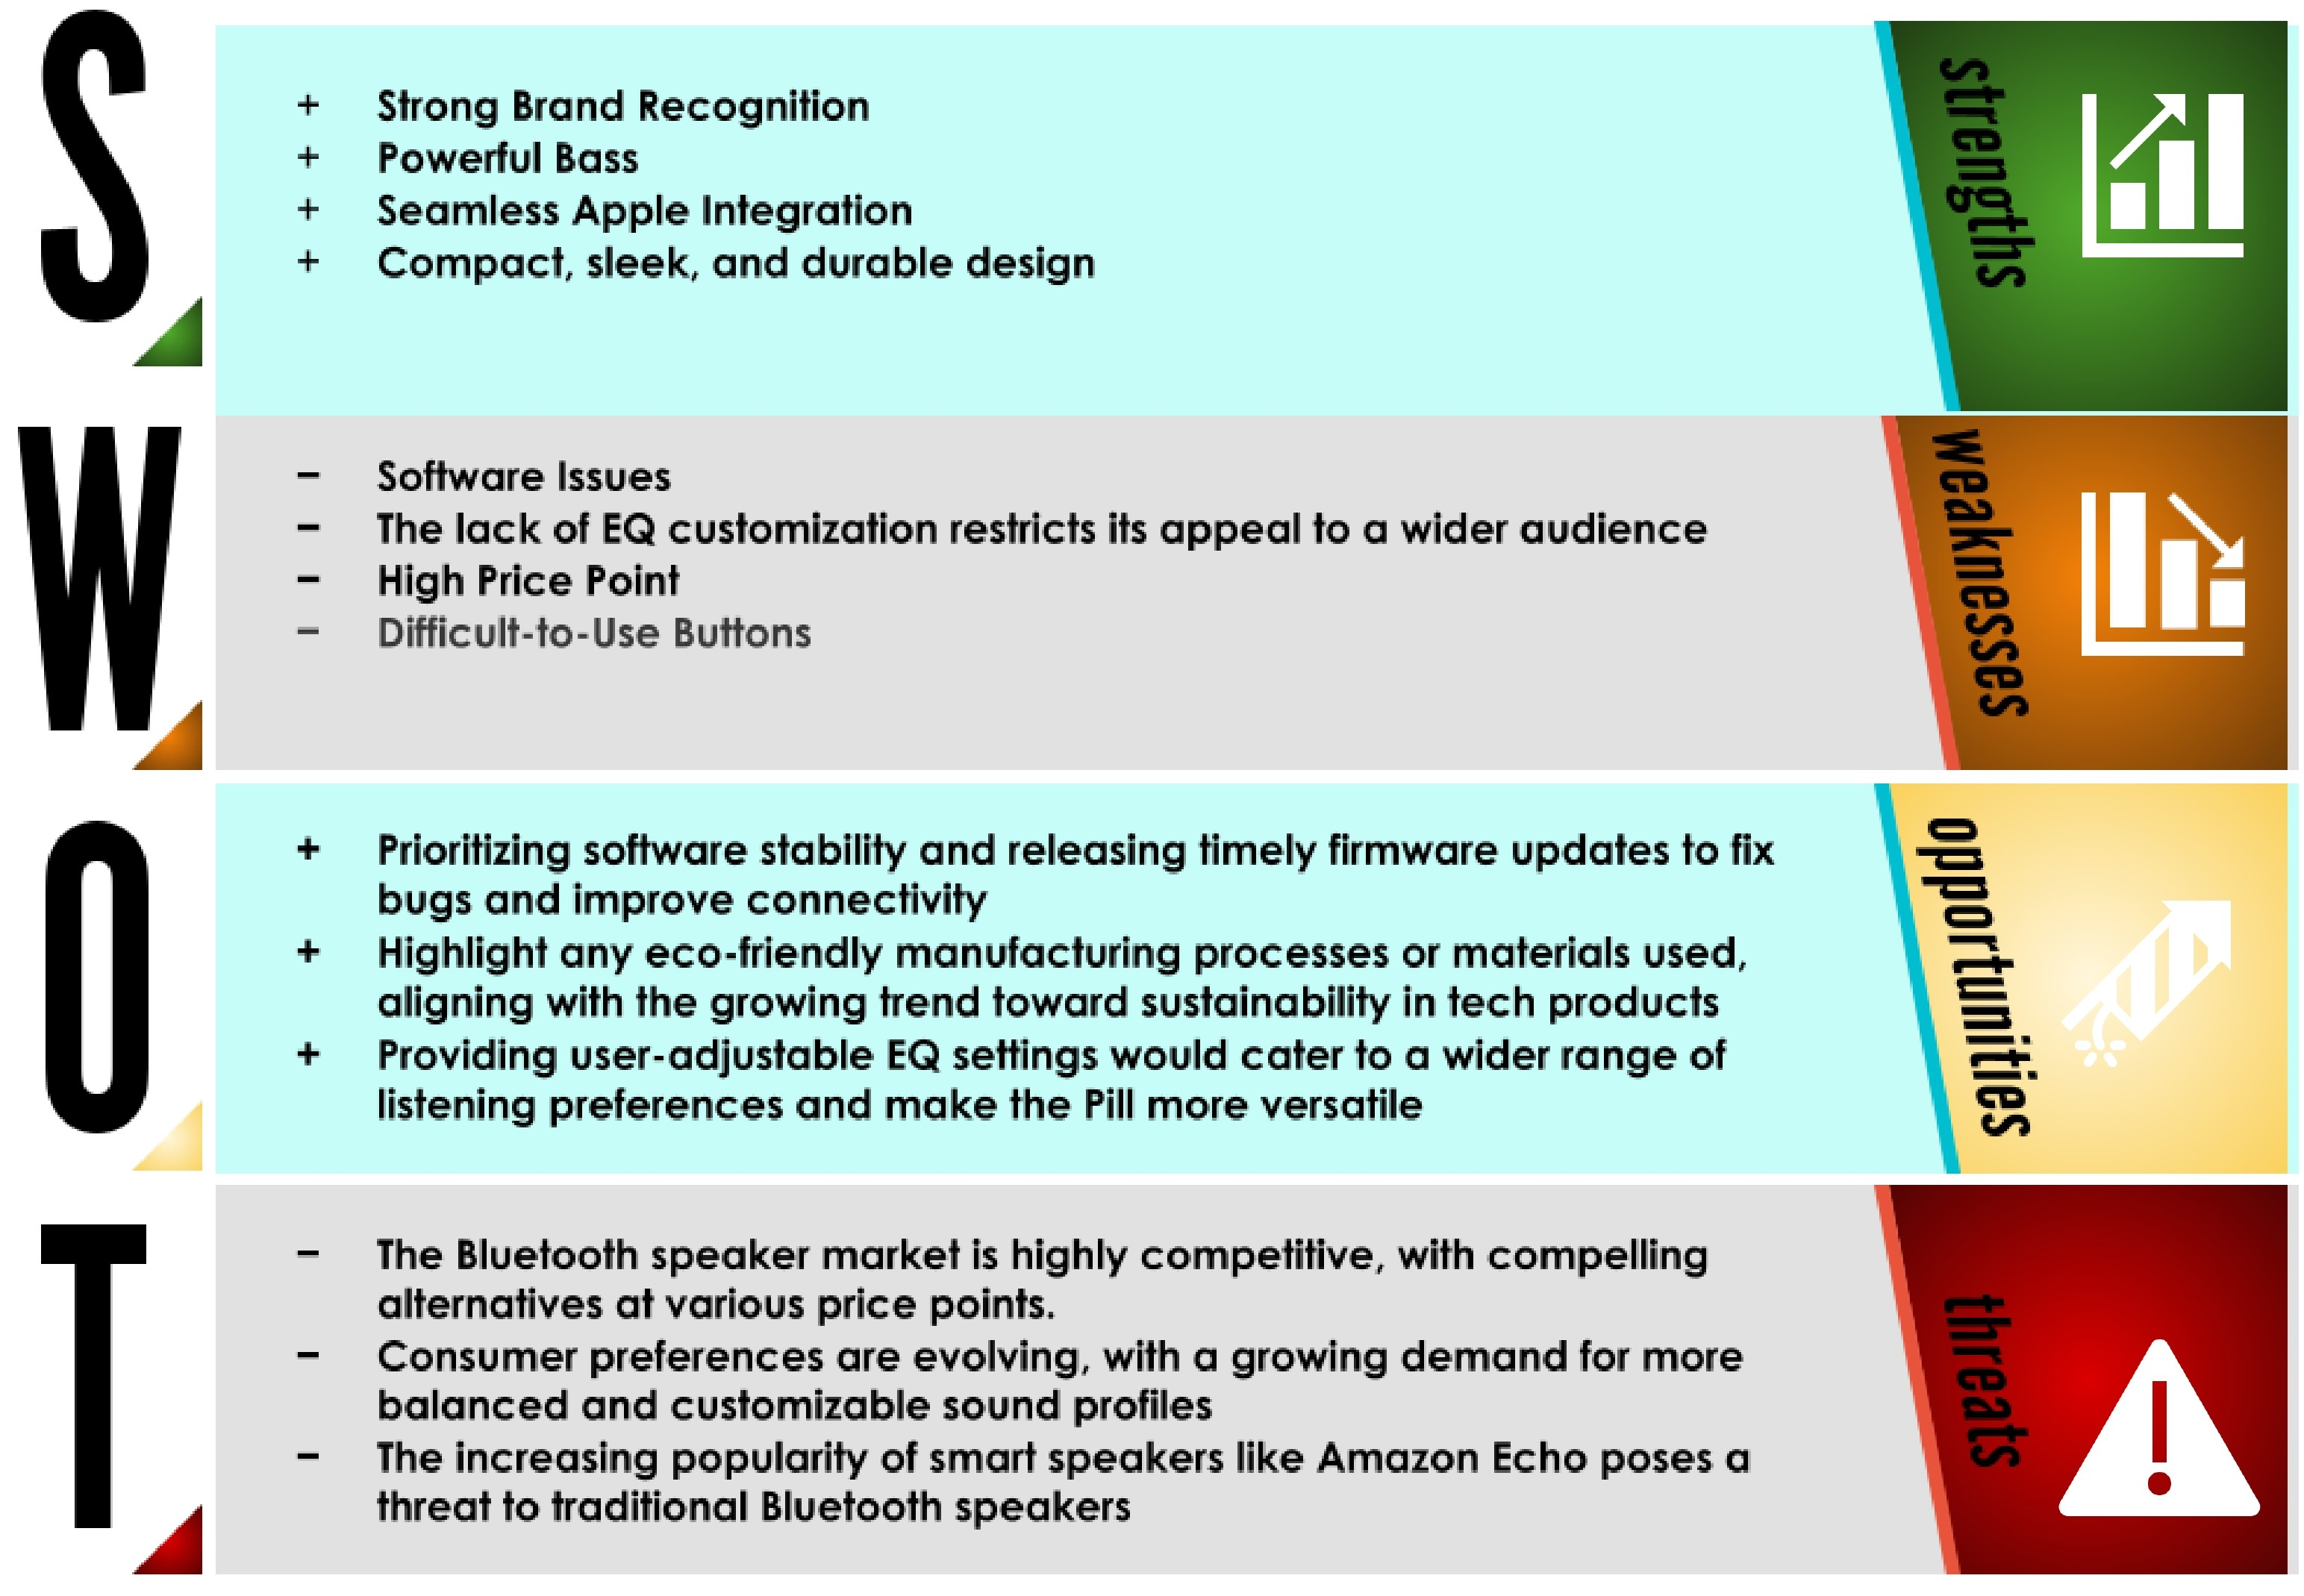

## 7. Strategic Recommendations

### 7.1 Product Improvements

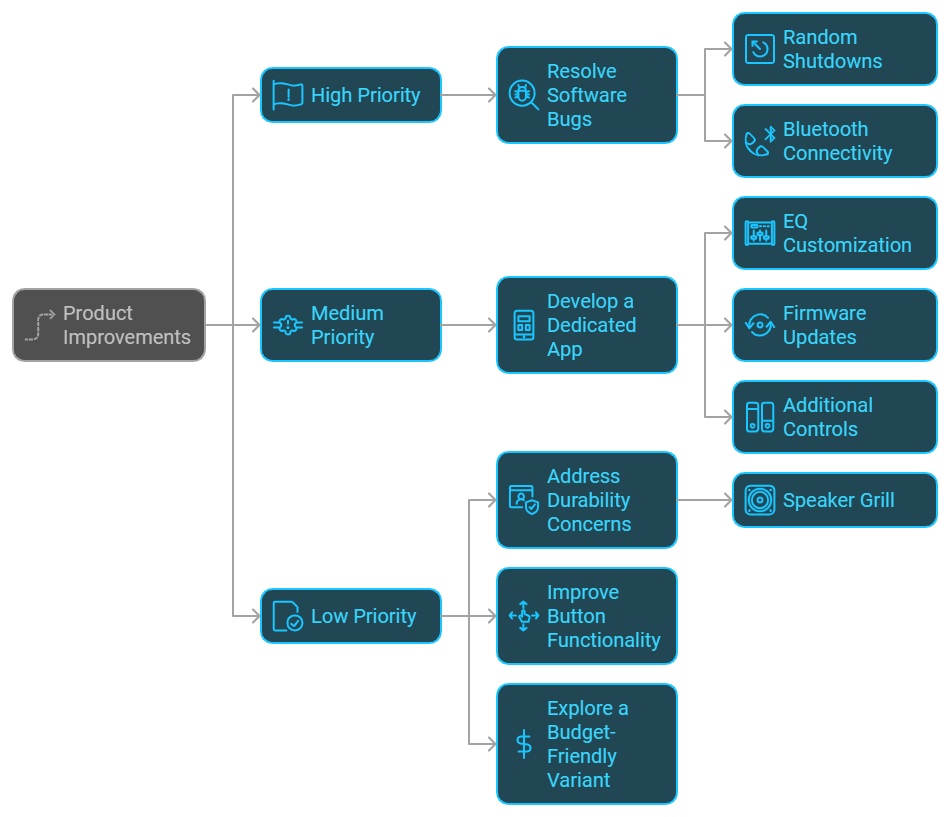

### 7.2 Marketing Strategies

Recommendations for marketing strategies that could enhance consumer perception and satisfaction.

* **Tailored Messaging:**

 * **Apple Users:** Emphasize seamless integration within the Apple ecosystem, like "Find My" feature and app compatibility.
 * **Audiophiles:** Focus on sound quality, customization, and the potential for EQ adjustments.
 * **Outdoor/Portability Fans:** Highlight product durability, battery life, water/dust resistance, and portability.
 * **Value-Conscious Consumers:** Promote long-term value, focusing on product durability and innovative features.


* **Content & Influencer Marketing:**

 * **Product Demos & Videos:** Use high-quality videos to demonstrate product strengths, including sound quality and design.
 * **Influencers:** Partner with influencers whose audiences align with Beats' target demographics (e.g., musicians, athletes, tech reviewers, music reactors...).


* **Sustainability Initiatives:** Highlight any eco-friendly manufacturing processes or materials used, aligning with the growing trend toward sustainability in tech products.

### 7.3 Future Research

Here are some areas for future research and additional data that could enhance the Beats Pill analysis:

### 1. **Deeper Dive into Customer Segments:**

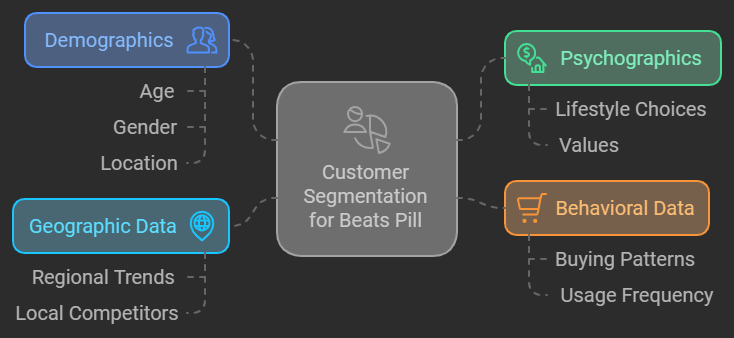

### 2. **Competitive Benchmarking:**

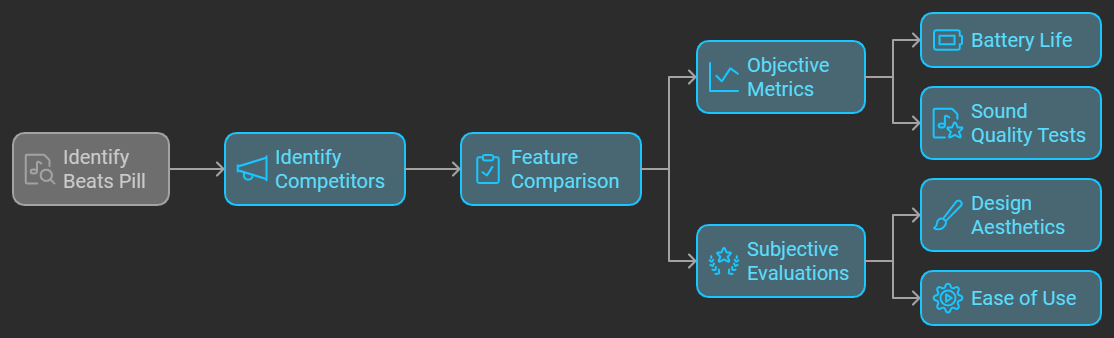

### 3. **Product Usage Data:**

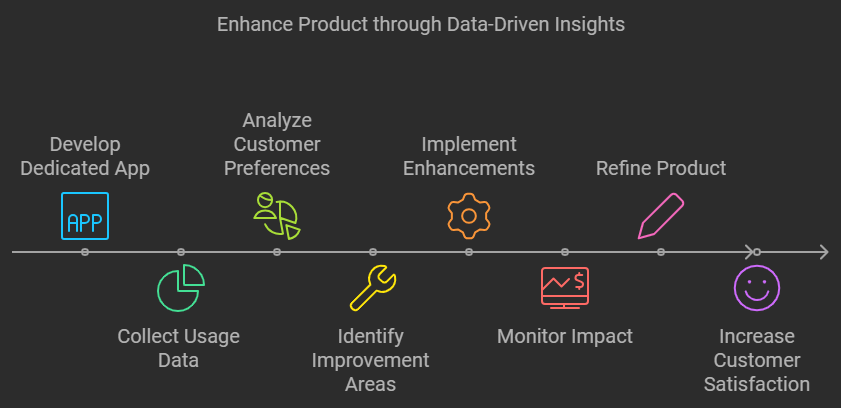

### 4. **Longitudinal Analysis:**

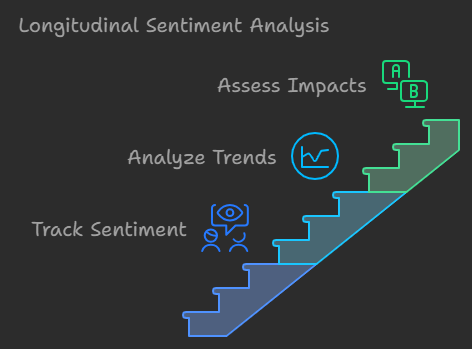



### 5. **Qualitative Research:**

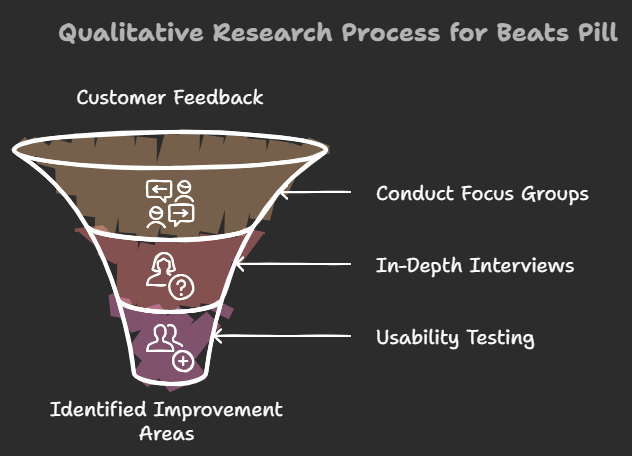

## 8. Conclusion

This deep dive into the world of the **Beats Pill** reveals a product with both powerful potential and areas for improvement. By analyzing customer reviews and leveraging the analytical capabilities of Gemini AI, a clear understanding of consumer sentiment was uncovered.

### **Key Findings:**

* **Bass is King, But Balance is Queen:** The Pill's powerful bass is a signature strength, but a more balanced sound profile and EQ customization would broaden its appeal.

* **Software Stability is Crucial:** Recurring software bugs are a major pain point, eroding user trust. Prioritizing bug fixes and robust testing is essential.

* **Apple Users Crave Control:** The lack of a dedicated iOS app is a missed opportunity. An app with EQ controls, firmware updates, and other features would be a game-changer for this key segment.

* **Price Perception Matters:** The Pill is often seen as overpriced. Exploring a budget-friendly variant or emphasizing long-term value could attract more price-sensitive buyers.

### **Turning Insights into Action:**

* **Fix the Bugs, Build the App:** Prioritize software stability and develop a feature-rich iOS app to address core user frustrations.

* **Fine-Tune the Sound:** Explore options for a more balanced sound profile and EQ customization to cater to a wider audience.

* **Target the Right Message:** Tailor marketing campaigns to specific customer segments, highlighting the Pill's strengths to the right audience.

### **The Future of the Pill:**

By acting on these insights, Beats can transform the Pill from a good product with flaws into a great product that truly resonates with consumers. Continuous monitoring of customer feedback and a commitment to iterative improvement will be key to the Pill's long-term success.

## 9. References

Sources and references used in the project.


[Beatsbydre.com](https://www.beatsbydre.com/)

[Amazon.com](https://www.amazon.com/)

[OxyLabs API](https://oxylabs.io/)

[cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=%F0%9F%98%98%F0%9F%98%98)

[Stack**overflow**](https://stackoverflow.com/questions/64320883/the-size-of-tensor-a-707-must-match-the-size-of-tensor-b-512-at-non-singleto)

[creating bigram/trigram wordclouds](https://thinkingneuron.com/how-to-create-a-bigram-trigram-wordcloud-in-python/)

[SWOT Analysis template](https://www.smartsheet.com/content/how-to-do-swot-analysis)

[Gemini API](https://ai.google.dev/)

[Turn text into visuals](https://www.napkin.ai/)